# Домашнє завдання 6

# Завантаження датасету

In [1]:
from pathlib import Path

SAVED_DATAFRAME_BASE = Path("/content/")
URL="https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download&authuser=0"
OUTPUT = Path("/content/data.zip")
CSV_DATA_PATH  = Path("/content/data")
SEED = 42

In [2]:
if not OUTPUT.is_file():
  !wget -q -O $OUTPUT $URL

if OUTPUT.is_file() and not CSV_DATA_PATH.is_dir():
  !unzip -q -o $OUTPUT

## 2d

In [3]:
import pandas as pd

data_2d = pd.read_csv(CSV_DATA_PATH.joinpath("data_2d.csv"), header=None ,names=["X","Y","Z"])
data_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


## mnist

In [4]:
data_mnist_raw = pd.read_csv(CSV_DATA_PATH.joinpath("mnist.csv"), header=None)
data_mnist_y = data_mnist_raw.iloc[:,0]
data_mnist = data_mnist_raw.iloc[:,1:]
data_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 3.0 MB


In [5]:
data_mnist_y.value_counts().sort_index()

0    42
1    67
2    55
3    45
4    55
5    50
6    43
7    49
8    40
9    54
Name: 0, dtype: int64

In [6]:
data_mnist_y.value_counts().min()

40

In [7]:
data_mnist_y.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

### SCALE mnist

In [8]:
data_mnist.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506000,0.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.314504,5.724334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def downscale_pix_val(x):
 return x / 255

def upscale_pix_val(y):
 return y * 255

data_mnist = downscale_pix_val(data_mnist)

In [10]:
data_mnist.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001984,0.001004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044371,0.022448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.501961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Завдання 1

## Алгоритм K-means для кластеризації

In [13]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import decomposition

import numpy as np

method_kmeans = lambda cl: KMeans(n_clusters=cl, random_state=SEED, n_init="auto")


def get_kmeans_list(df, k_list, method=None, axis=0):
  if method is None:
    method = method_kmeans
  if axis is None:
    X = df
  else:
    X = scale(df, axis=axis, with_mean=True, with_std=True)
  kmeans_list = []
  for cl in k_list:
    kmeans = method(cl)
    kmeans.fit(X)
    kmeans_list.append(kmeans)
  return kmeans_list, X

In [15]:
def best_silhouette_score(k_list, kmeans_list, X):
  scores = []
  for kmeans in kmeans_list:
    labels = kmeans.labels_
    scores.append(silhouette_score(X, labels))
  best_score = max(scores)
  best_k  = k_list[scores.index(best_score)]
  return best_k, best_score, scores

In [16]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [17]:
figsize=(18, 8)

def plot_kmeans(k_list, kmeans_list, version=""):
  inertias = [ kmeans.inertia_ for kmeans in kmeans_list ]
  fig = plt.figure(1, figsize=figsize)
  x = k_list
  y = inertias
  spl = make_interp_spline(x, y, k=3)
  x_spline = np.linspace(min(x), max(x), 200)
  y_spline = spl(x_spline)
  plt.plot(x_spline, y_spline, 'r-', linewidth=0.5, label='Spline of Elbow')
  plt.plot(x , inertias, marker='o', linewidth=2 ,label='Elbow')
  if version:
    version = f", ({version})"
  plt.xlabel('Кластерів')
  plt.ylabel('Сума квадратів відстаней до центру')
  plt.title(f'Метод ліктя')
  if len(k_list) < 40:
    plt.xticks(k_list)
  else:
    plt.xticks([k for k in k_list if k % (2 if k < 100 else 5) == 0])
  plt.grid(True)
  plt.legend()
  plt.show()

In [18]:
def plot_diff_kmeans(k_list, kmeans_list, version=""):
  inertias = [ kmeans.inertia_ for kmeans in kmeans_list ]
  y = np.diff(inertias) / np.diff(k_list)
  x = k_list[:-1]
  spl = make_interp_spline(x, y, k=2)
  x_spline = np.linspace(min(x), max(x), 200)
  y_spline = spl(x_spline)
  fig = plt.figure(1, figsize=figsize)
  plt.bar(x, y, label='$\\frac{\\Delta dy}{\\Delta dx}$')
  plt.plot(x_spline, y_spline, 'r-', label='Spline of $\\frac{\\Delta dy}{\\Delta dx}$')
  if version:
    version = f", ({version})"
  plt.xlabel('Кластерів')
  plt.ylabel('Зміна сумм квадратів відстаней до центру')
  plt.title(f'Метод ліктя. Швидкість змін.')
  if len(k_list) < 40:
    plt.xticks(k_list)
  else:
    plt.xticks([k for k in k_list if k % (2 if k < 100 else 5) == 0])
  plt.grid(True)
  plt.legend()
  plt.show()

In [19]:
def plot_silhouette_kmeans(k_list, kmeans_list, X, version=""):
  best_k, best_score, scores = best_silhouette_score(k_list, kmeans_list, X)
  fig = plt.figure(1, figsize=figsize)
  plt.plot(k_list, scores, marker='x')
  plt.axvline(x=best_k, color = 'r', label = f'best_k: {best_k}, score: {best_score:.4}')
  plt.xlabel('Кластерів')
  plt.ylabel('silhouette score')
  if version:
    version = f", ({version})"
  plt.title(f'Пошук оптимального k')
  if len(k_list) < 40:
    plt.xticks(k_list)
  else:
    plt.xticks([k for k in k_list if k % (2 if k < 100 else 5) == 0])
  plt.grid(True)
  plt.legend()
  plt.show()
  print(f"{best_score=}")
  print(f"{best_k=}")

In [20]:
def plot_mnist_picture(df, id, plt=plt):
  data = df.iloc[id,:]
  p_size = int(data.shape[0]**(0.5))
  data = data.values.reshape(p_size, p_size)
  plt.imshow(data, cmap='gray_r', interpolation='nearest')
  plt.axis('off')
  plt.show()

#### Датасет 2d,  пошук k

In [21]:
min_k, max_k = 2, 40
k_list = range(min_k, max_k + 1)

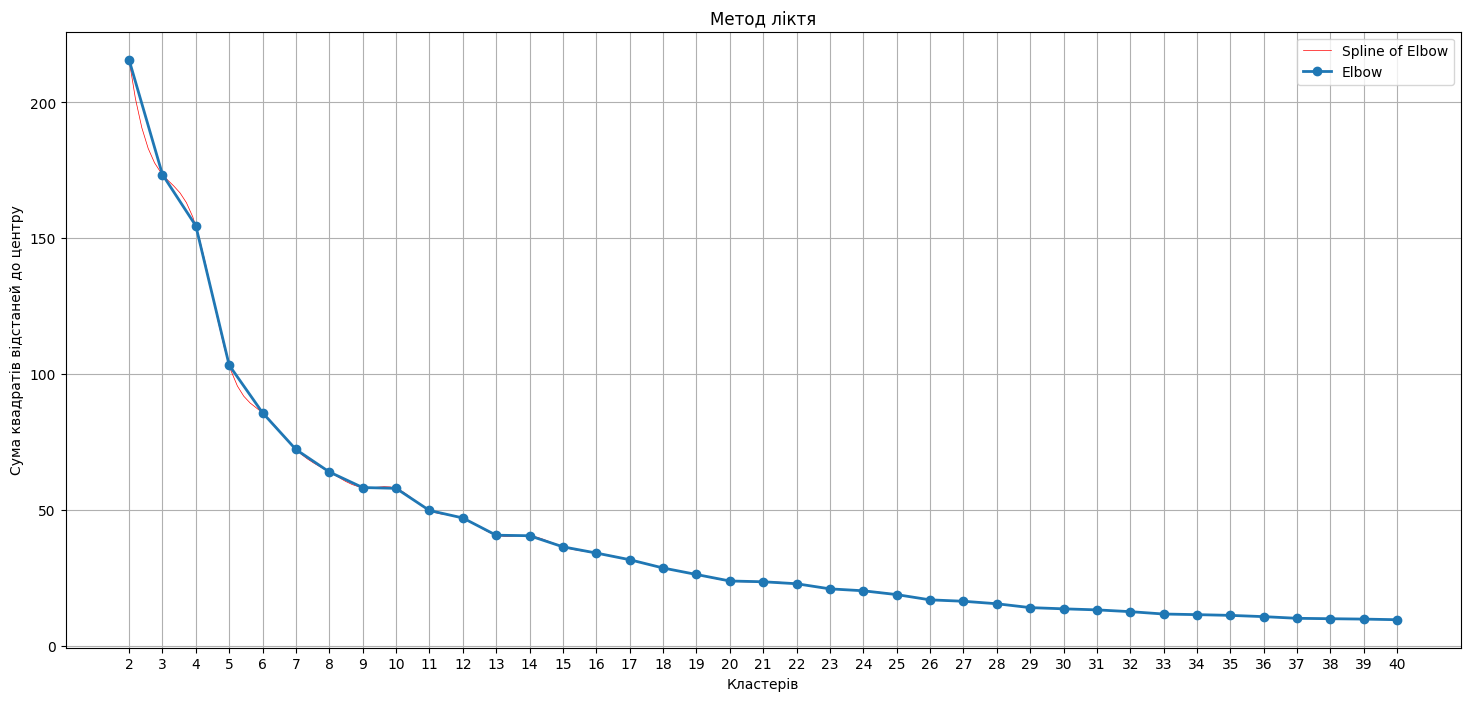

In [22]:
kmeans_list, X = get_kmeans_list(data_2d, k_list, axis=0)
version="2D, STD=ON"
plot_kmeans(k_list, kmeans_list,version=version)

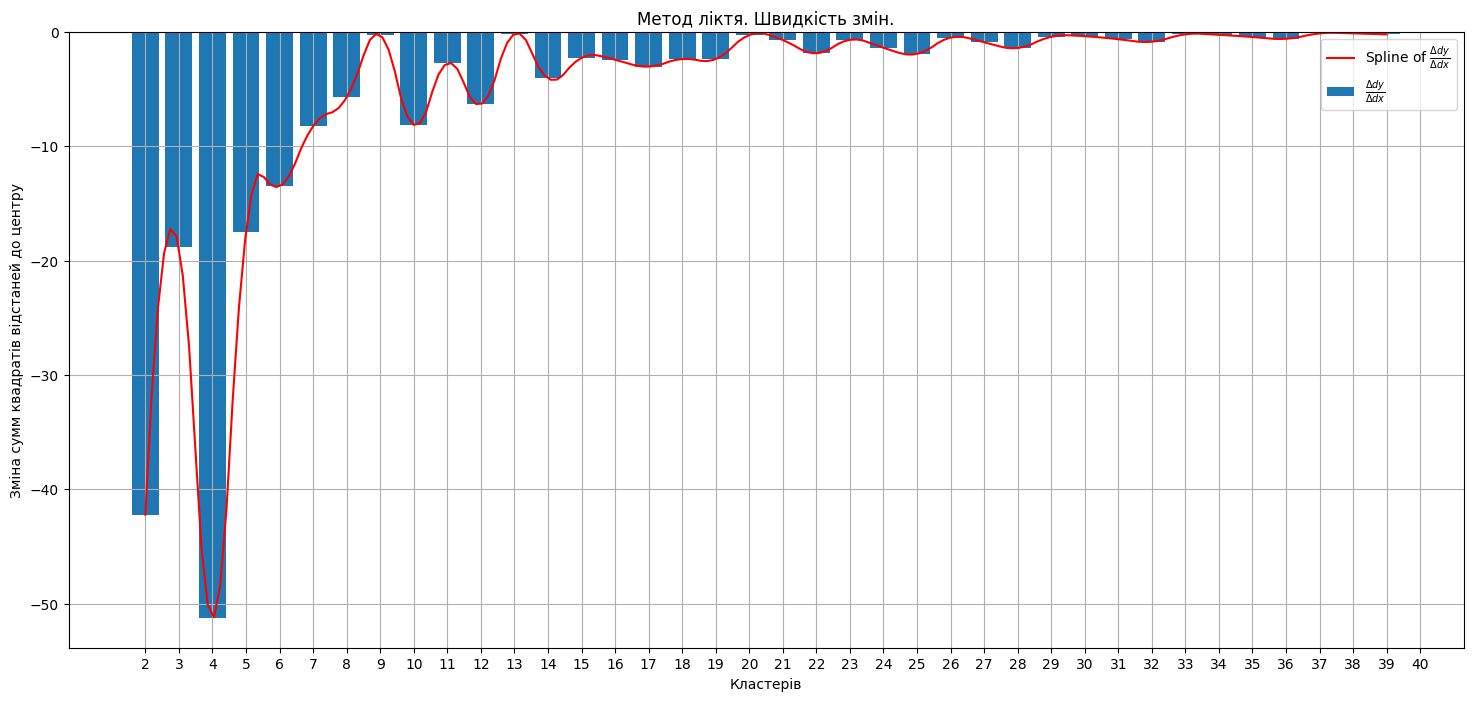

In [23]:
plot_diff_kmeans(k_list, kmeans_list, version=version)

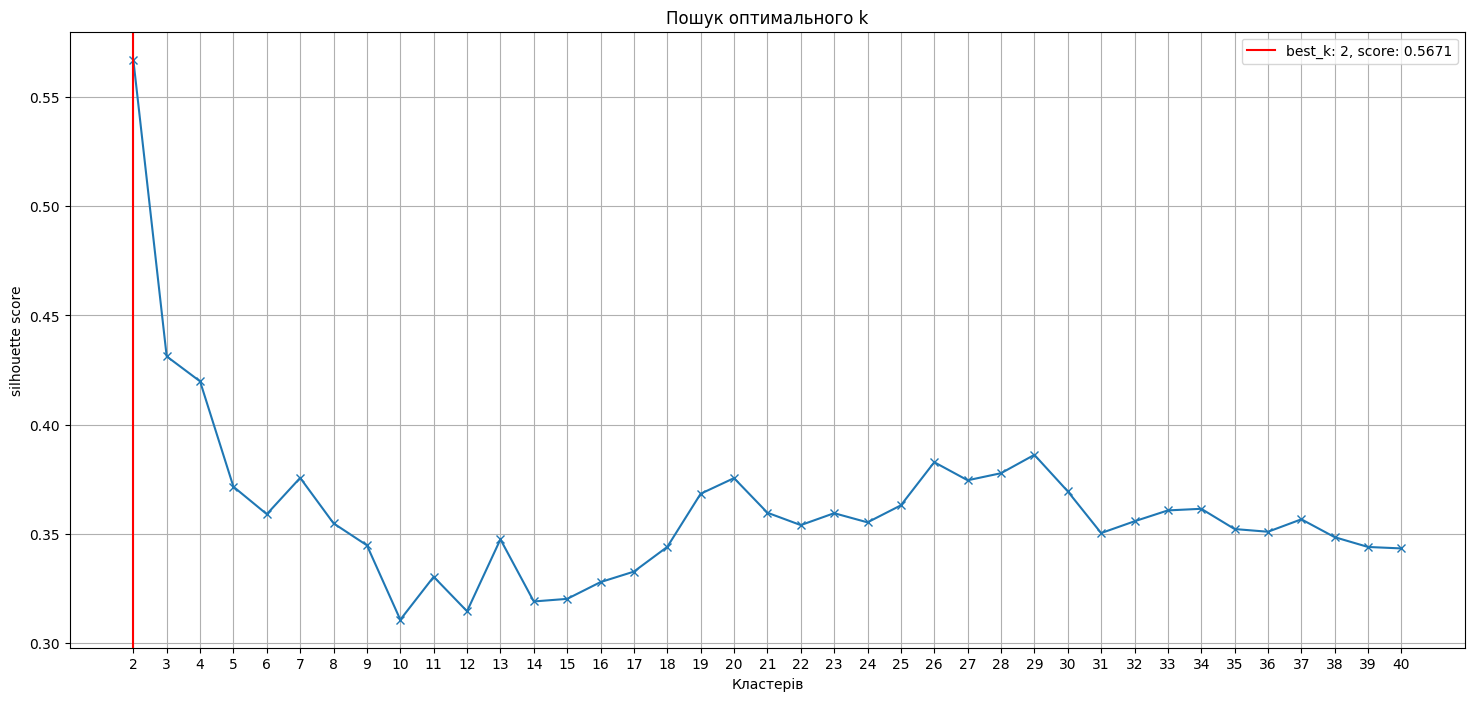

best_score=0.5671182203740045
best_k=2


In [24]:
plot_silhouette_kmeans(k_list, kmeans_list, X, version=version)

#### Датасет 2d, результат для k=2

In [25]:
k = 2
k_id = k_list.index(k)
kmeans_2d = kmeans_list[k_id]

In [26]:
print(f"{kmeans_2d.labels_.shape}")
print(f"{kmeans_2d.labels_}")

(200,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Пошук центрів кластерів та відстані між ними

In [27]:
print("Центри кластерів")
print(f"{kmeans_2d.cluster_centers_}")
length = euclidean_distances(kmeans_2d.cluster_centers_)
print("Відстань між центрами кластерів")
print(length)

Центри кластерів
[[ 1.          0.56518053  0.82493211]
 [-0.96078431 -0.54301659 -0.79258183]]
Відстань між центрами кластерів
[[0.         2.77292757]
 [2.77292757 0.        ]]


#### Датасет mninst,  пошук k

In [28]:
min_k, max_k = 3, 30
k_list = range(min_k, max_k + 1)
std = False
kmeans_list, X = get_kmeans_list(data_mnist, k_list, axis=(0 if std else None))
version=f'MNIST, STD={"ON" if std else "OFF"}'

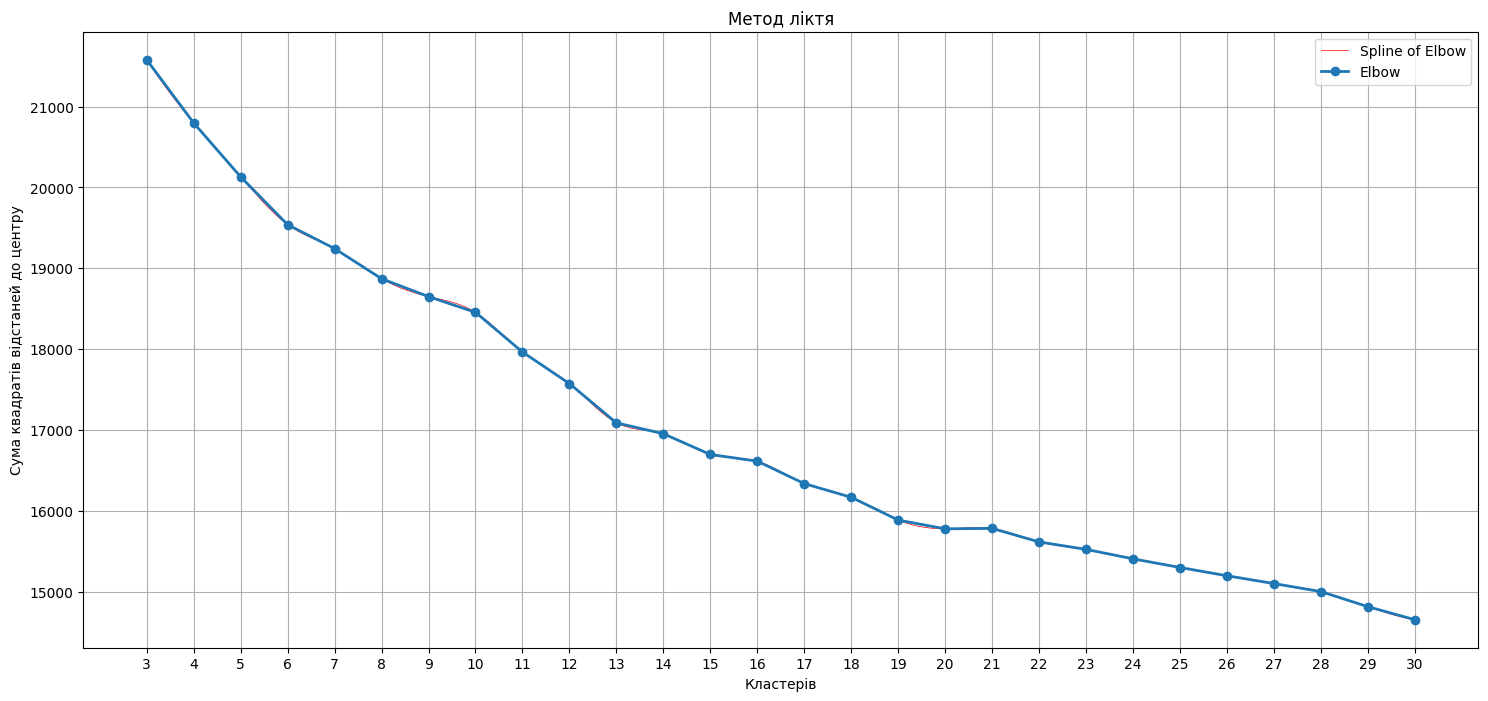

In [29]:
plot_kmeans(k_list, kmeans_list, version=version)

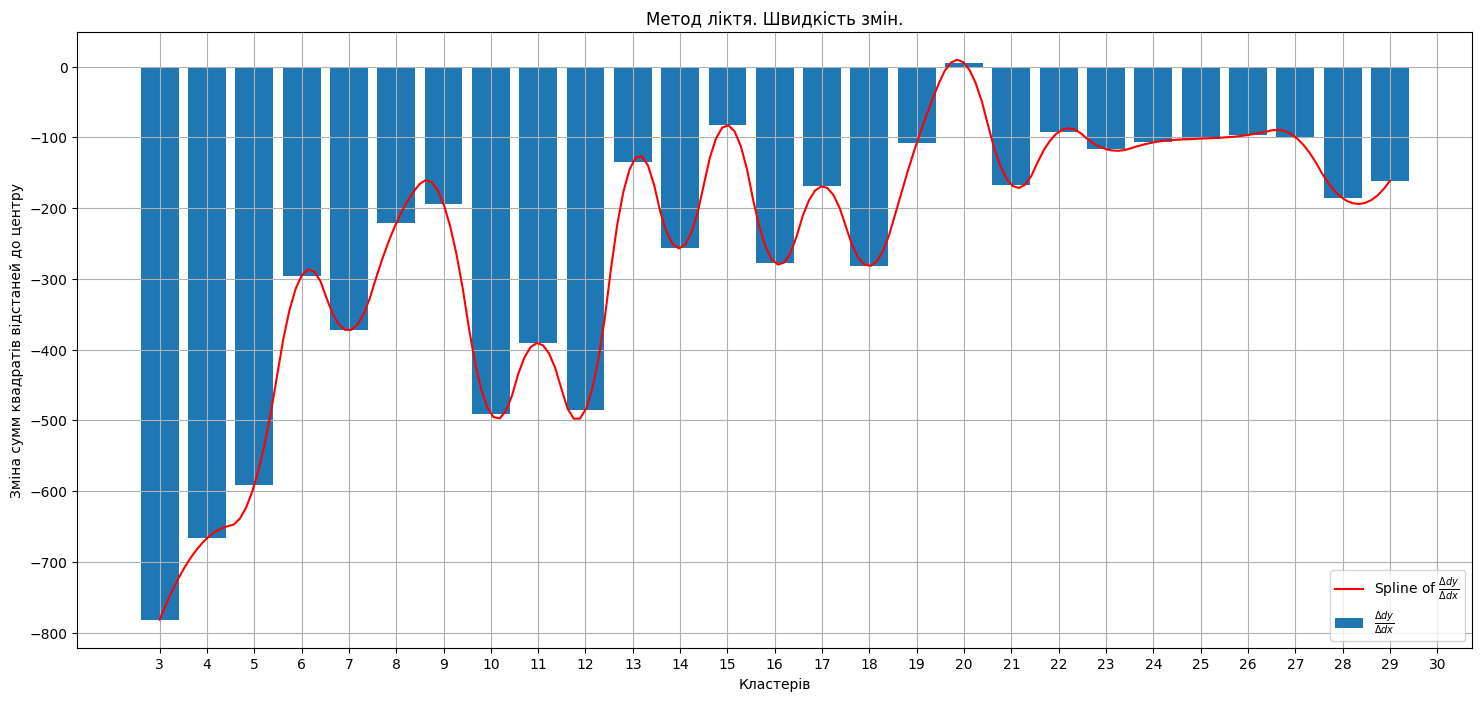

In [30]:
plot_diff_kmeans(k_list, kmeans_list, version=version)

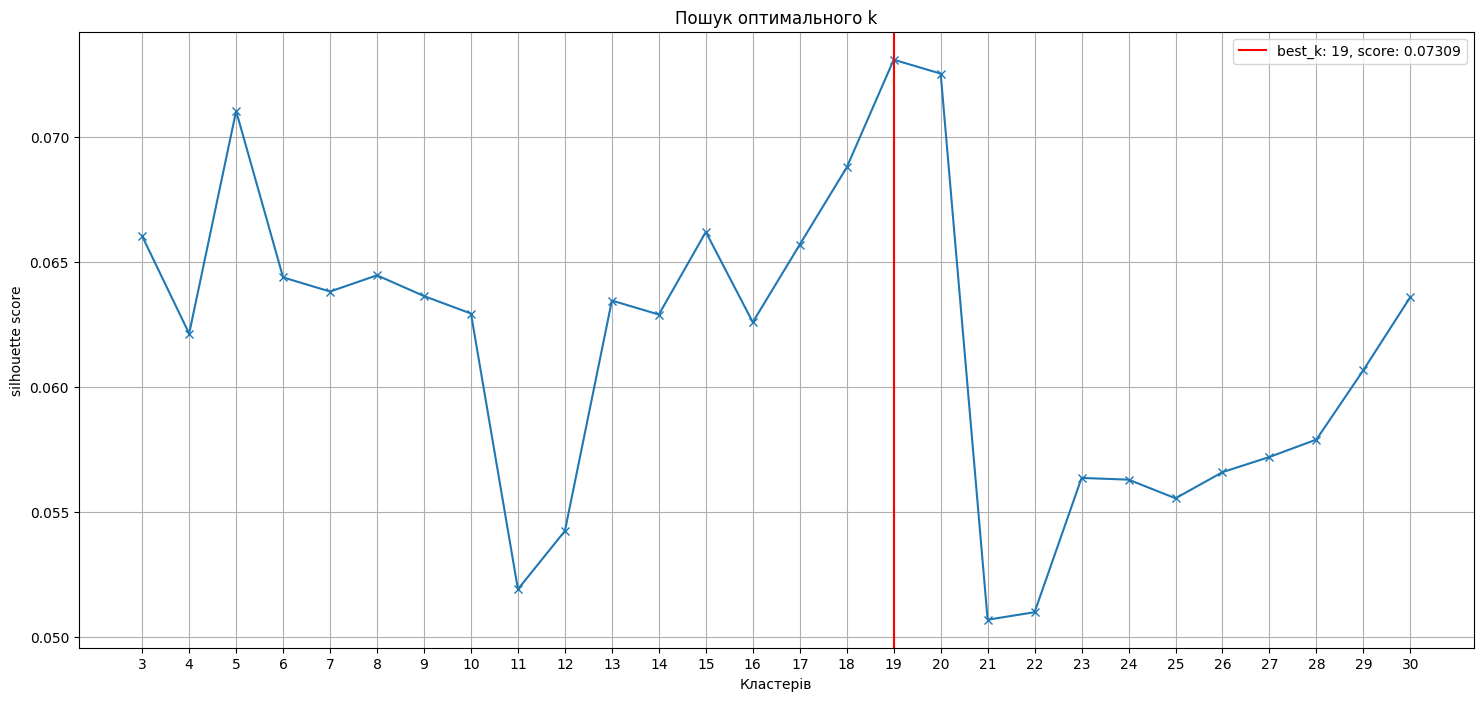

best_score=0.07308983650986063
best_k=19


In [31]:
plot_silhouette_kmeans(k_list, kmeans_list, X, version=version)

#### Датасет mnist, результат k=19

In [32]:
k = 19
k_id = k_list.index(k)
kmeans_minst = kmeans_list[k_id]

### Пошук центрів кластерів та відстані між ними

In [33]:
print("Центри кластерів")
print(f"{kmeans_minst.cluster_centers_}")
print(f"{kmeans_minst.cluster_centers_.shape=}")
lengths = euclidean_distances(kmeans_minst.cluster_centers_)
print("Відстань між центрами кластерів")
print(lengths)

Центри кластерів
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
kmeans_minst.cluster_centers_.shape=(19, 784)
Відстань між центрами кластерів
[[ 0.          5.41643067  5.24735551  6.54443     8.26042614  6.69229702
   5.21653941  5.9308005   6.23516006  4.66012241  6.57891343  6.47458025
   4.72425258  7.25584857  5.61189669  5.97226251  7.28656542  5.29137984
   7.28742998]
 [ 5.41643067  0.          5.51791661  6.51536418  7.68410964  5.25888981
   3.90794292  6.66906768  4.83592443  4.91384425  5.6704456   6.34776962
   6.06314382  7.68401652  6.46904082  4.46563697  6.71651004  5.11278758
   6.22678633]
 [ 5.24735551  5.51791661  0.          4.6949152   8.5306363   6.35704
   4.15238034  7.25293653  5.72101748  4.85378834  6.22552812  4.5041328
   5.5388413   8.09015713  6.12944811  4.52112993  5.37306219  5.40035517
   5.97701046]
 [ 6.54443     6.51536418  4.6949152   0. 

### Вкористаня алгоритму PCA для зменшення розмірності даних

In [34]:
pca = decomposition.PCA(0.95)
data_mnist_pca = pca.fit_transform(data_mnist)
min_k, max_k = 3, 30
k_list_pca = list(range(min_k, max_k + 1))
kmeans_list_pca, X_pca = get_kmeans_list(data_mnist_pca, k_list_pca, axis=None)
version="MNIST, PCA(0.95), STD=OFF"

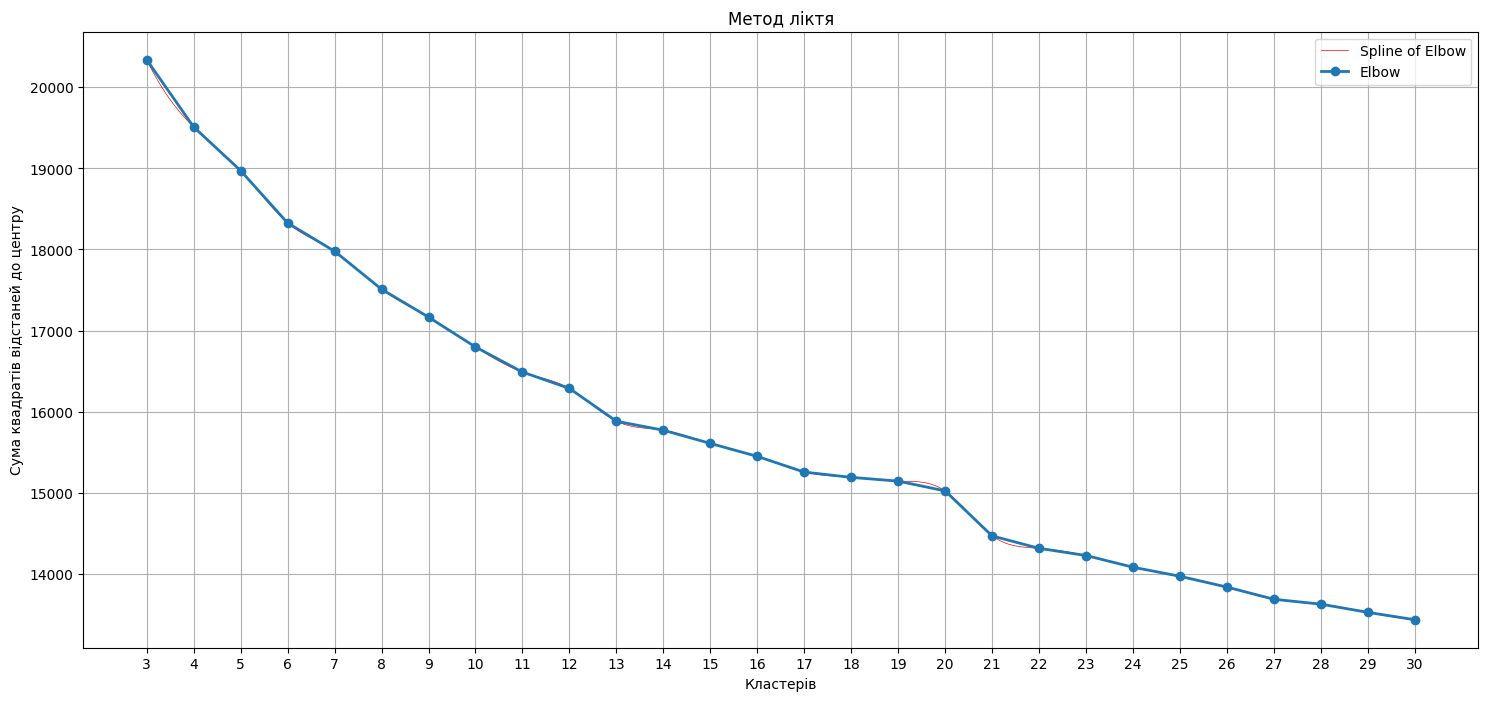

In [35]:
plot_kmeans(k_list_pca, kmeans_list_pca, version=version)

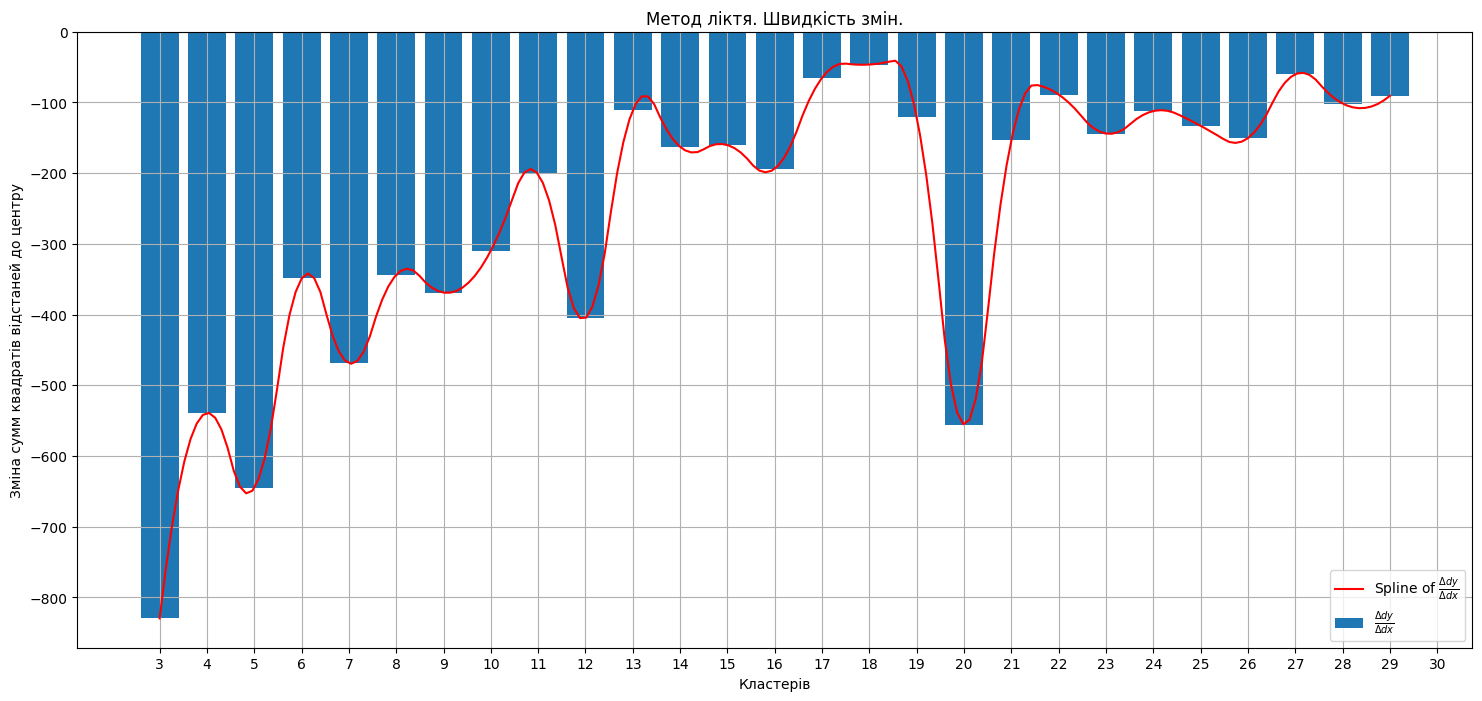

In [36]:
plot_diff_kmeans(k_list_pca, kmeans_list_pca, version=version)

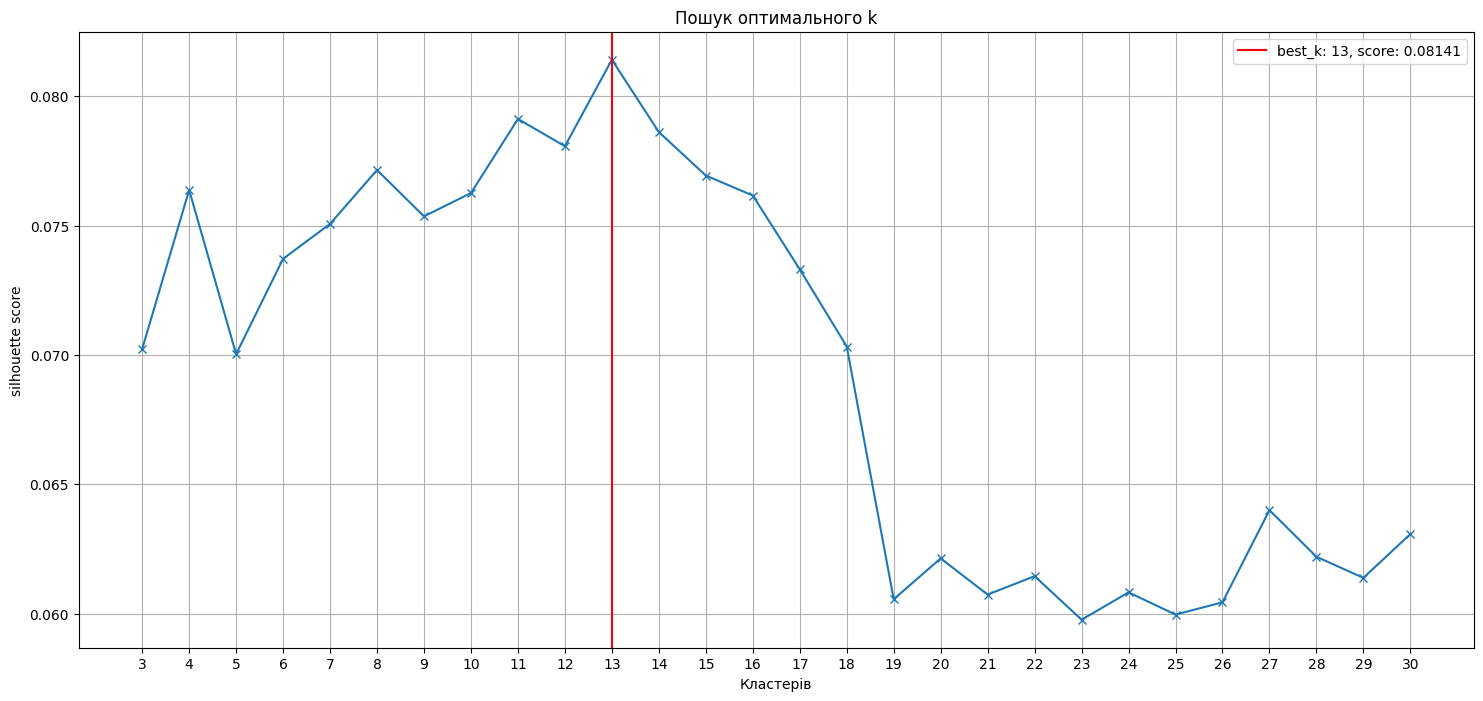

best_score=0.08141150955990363
best_k=13


In [37]:
plot_silhouette_kmeans(k_list_pca, kmeans_list_pca, X_pca, version=version)

#### Датасет mnist &PCA, результат k=13

In [38]:
k = 13
k_id = k_list_pca.index(k)
kmeans_minst_pca = kmeans_list_pca[k_id]


# Завдання 2

## Візуалізація результату роботи кластеризації.

## Датасет 2d

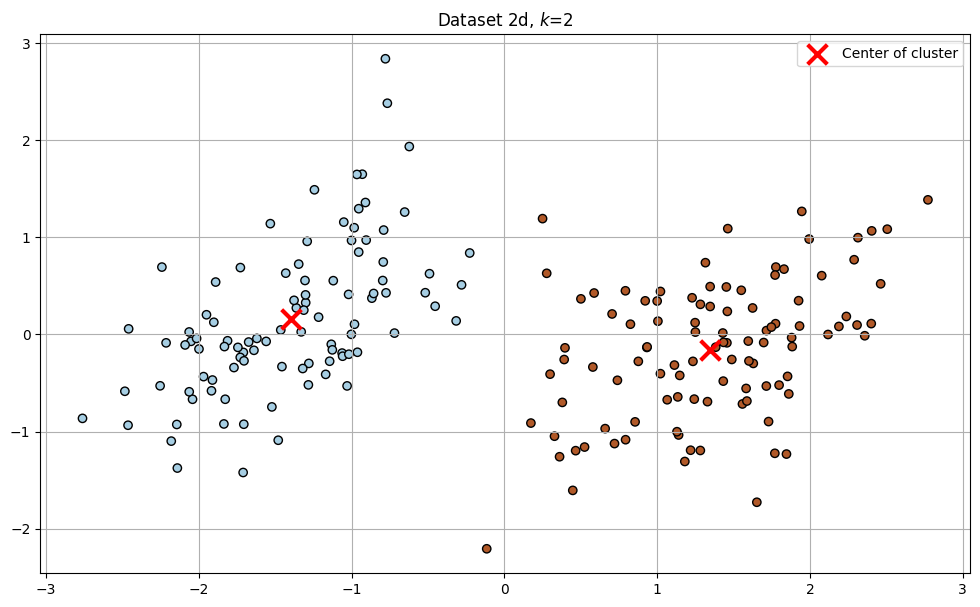

In [39]:
sc = StandardScaler()
sc_pca = StandardScaler()
fig = plt.figure(1, figsize=(12, 7))
plt.clf()
ax = fig.add_subplot(111)
plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(sc.fit_transform((data_2d)))
X = pca.transform(sc.transform(data_2d))
X_c = pca.transform(kmeans_2d.cluster_centers_)
ax.scatter(X[:, 0], X[:, 1], c=kmeans_2d.labels_, cmap="Paired", edgecolor="k")
ax.scatter(X_c[:, 0], X_c[:, 1], c="red", marker='x', s=200, linewidths=3, label="Center of cluster")
plt.title(f"Dataset 2d, $k$={kmeans_2d.n_clusters}")
plt.grid()
plt.legend()
plt.show()

## Датасет mnist

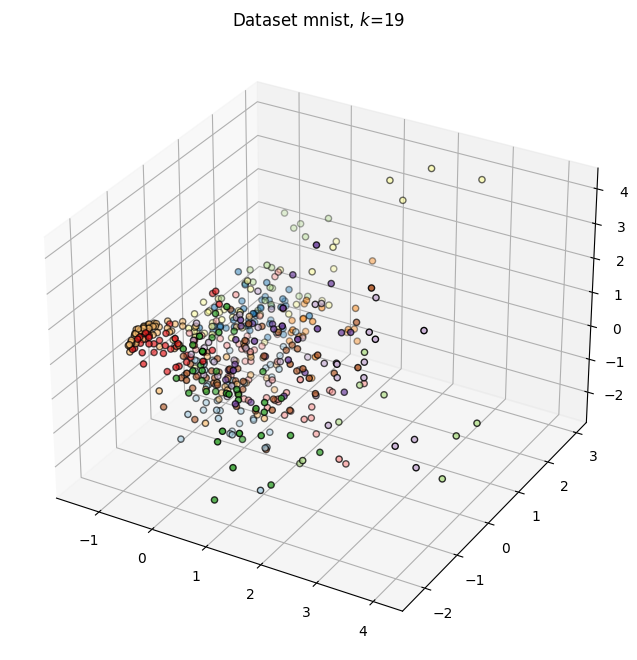

In [40]:
fig = plt.figure(1, figsize=(12, 8))
plt.clf()
ax = fig.add_subplot(111, projection="3d")
plt.cla()
pca = decomposition.PCA(n_components=3)
X = scale(pca.fit_transform(scale(data_mnist)))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_minst.labels_, cmap="Paired", edgecolor="k")
plt.title(f"Dataset mnist, $k$={kmeans_minst.n_clusters}")
plt.show()

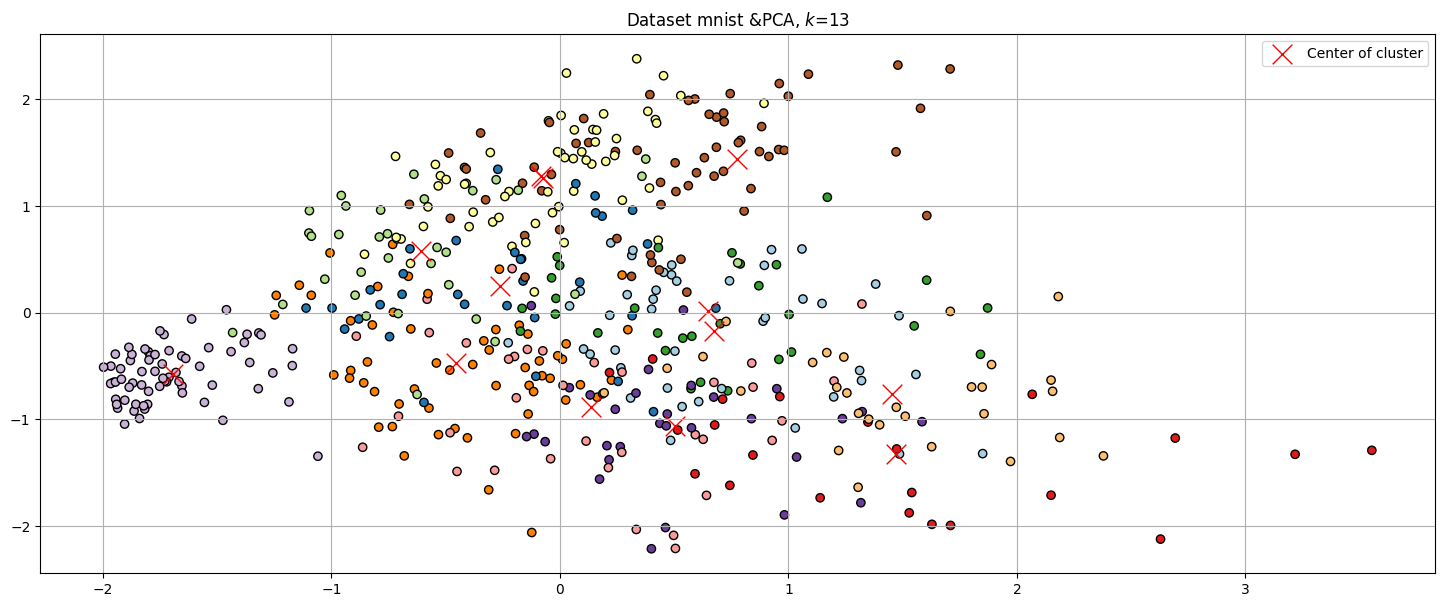

In [41]:
sc = StandardScaler()
fig = plt.figure(1, figsize=(18, 7))
plt.clf()
ax = fig.add_subplot(111)
plt.cla()
pca = decomposition.PCA(n_components=2)
X = sc.fit_transform(pca.fit_transform((data_mnist_pca)))
X_c = sc.transform(pca.transform(kmeans_minst_pca.cluster_centers_))
ax.scatter(X[:, 0], X[:, 1], c=kmeans_minst_pca.labels_, cmap="Paired", edgecolor="k")
ax.scatter(X_c[:, 0], X_c[:, 1], c="red", marker='x', s=200, linewidths=1, label="Center of cluster")
plt.title(f"Dataset mnist &PCA, $k$={kmeans_minst_pca.n_clusters}")
plt.grid()
plt.legend()
plt.show()